# Stratification v2

In [1]:
import sys

In [2]:
# append parent directory to use utils
sys.path.append("../")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils.bootstrap import bootstrap_experiment
from utils.prop_utils import prop_probs
from utils.strat_utils import calculate_stratified_effects

In [4]:
lalonde_exp = pd.read_csv("../data/lalonde_exp.csv")
lalonde_obs = pd.read_csv("../data/lalonde_psid.csv")

In [5]:
lalonde_exp.shape, lalonde_obs.shape

((445, 13), (2675, 13))

In [6]:
lalonde_exp["re78_re75"] = lalonde_exp["re78"] - lalonde_exp["re75"]
lalonde_obs["re78_re75"] = lalonde_obs["re78"] - lalonde_obs["re75"]

## Experimental Data

In [7]:
propensity_probabilities = prop_probs(
    lalonde_exp,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)

In [8]:
lalonde_exp = pd.merge(lalonde_exp, propensity_probabilities, on="id")

In [9]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_exp,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.64it/s]


In [10]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

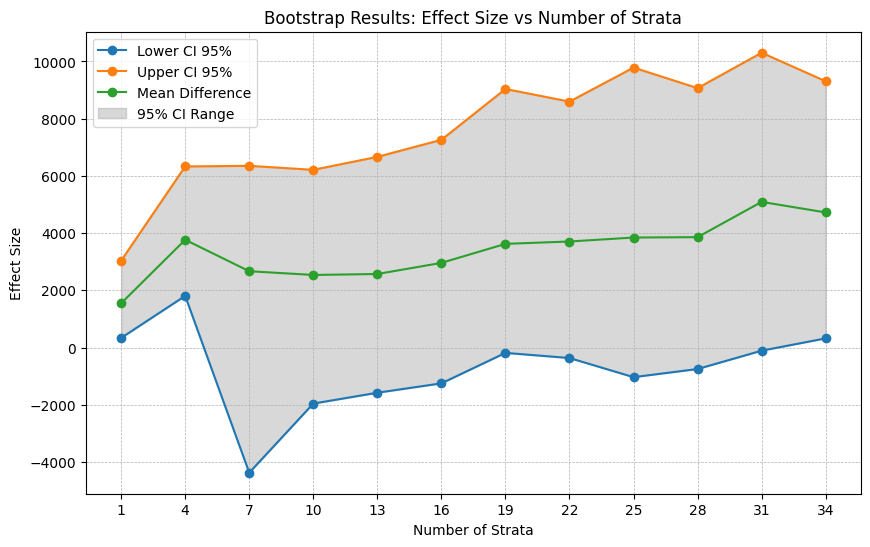

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("Bootstrap Results: Effect Size vs Number of Strata")
plt.legend()
plt.show()

In [12]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,1651.961516,596.454924,2886.328991
1,4,3822.803159,-387.304974,6662.061081
2,7,3020.664654,61.507963,6471.661892
3,10,2541.648777,-2098.551839,6496.221747
4,13,2813.948020,-1329.059988,5933.153993
5,16,2615.895119,-1385.836970,7772.353780
6,19,3134.312179,-554.661528,9078.041682
7,22,3401.699098,-1858.695188,10607.961800
8,25,4313.678526,-927.868748,10096.138801
9,28,4096.447901,-322.150020,9579.341287


## Observational Data

In [13]:
propensity_probabilities = prop_probs(
    lalonde_obs,
    "treat",
    "re78_re75",
    ["age", "education", "black", "hispanic", "married", "re74"],
)

In [14]:
lalonde_obs = pd.merge(lalonde_obs, propensity_probabilities, on="id")

In [15]:
bootstrap_results = {}
num_strata_values = range(1, 35, 3)

for num_strata in num_strata_values:
    bootstrap_results[num_strata] = bootstrap_experiment(
        lalonde_obs,
        calculate_stratified_effects,
        num_exp=1,
        n=50,
        ci=95,
        prop_col="propensity",
        treatment_col="treat",
        outcome_col="re78_re75",
        num_strata=num_strata,
    )

Running experiments: 100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.56it/s]


In [16]:
data = []
for num_strata, ci_array in bootstrap_results.items():
    mean = ci_array[0, 0]
    lower = ci_array[0, 1]
    upper = ci_array[0, 2]
    data.append([num_strata, mean, lower, upper])

ci_df = pd.DataFrame(data, columns=["num_strata", "mean", "lower_ci", "upper_ci"])

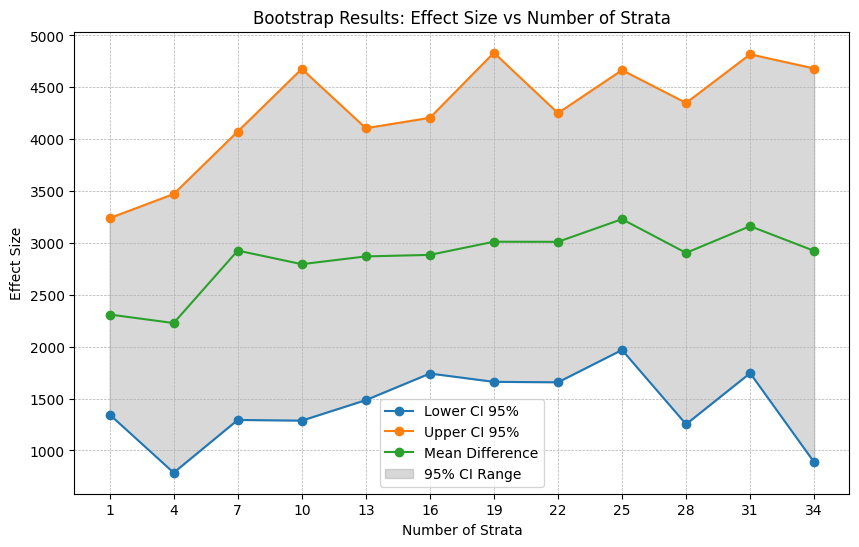

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(ci_df["num_strata"], ci_df["lower_ci"], label="Lower CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["upper_ci"], label="Upper CI 95%", marker="o")
plt.plot(ci_df["num_strata"], ci_df["mean"], label="Mean Difference", marker="o")

plt.fill_between(
    ci_df["num_strata"],
    ci_df["lower_ci"],
    ci_df["upper_ci"],
    color="gray",
    alpha=0.3,
    label="95% CI Range",
)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.xticks(ci_df["num_strata"])
plt.xlabel("Number of Strata")
plt.ylabel("Effect Size")
plt.title("Bootstrap Results: Effect Size vs Number of Strata")
plt.legend()
plt.show()

In [18]:
ci_df

,num_strata,mean,lower_ci,upper_ci
0,1,2310.085800,1346.335543,3239.086240
1,4,2227.818090,785.361359,3471.637771
2,7,2926.397375,1294.018632,4074.020057
3,10,2795.408338,1287.281344,4677.586335
4,13,2870.140189,1485.145662,4106.036151
5,16,2884.970686,1741.365607,4206.122724
6,19,3011.837178,1661.204909,4833.352032
7,22,3010.904639,1656.881485,4251.527929
8,25,3229.204884,1968.747330,4665.636600
9,28,2904.194317,1252.602528,4349.479816
